# Tensor Network Renormalization Group for the 2D Ising model

Define the basic functions for the Ising model

Define Kronecker Delta

In [1]:
using LinearAlgebra

In [2]:
using Plots

In [3]:
function kronecker_delta(i::Int,j::Int)
    
    res = 0.
    
    if i==j
        
        res = 1.
        
    end
    
    res
    
end

kronecker_delta (generic function with 1 method)

In [4]:
kronecker_delta(1,1)

1.0

In [5]:
kronecker_delta(1,2)

0.0

Define the weight functions of Ising model

In [6]:
function weight(beta::Float64,k::Int)
    
    res = 1/2 * (exp(beta) + (-1)^k * exp(-beta))
    
    res
    
end

weight (generic function with 1 method)

In [7]:
weight(1.5,0)

2.352409615243247

Define the initial tensor

In [8]:
function init_tensor(beta::Float64)
    
    tensor = zeros(2,2,2,2)
    
    for i in 1:2, j in 1:2, k in 1:2, l in 1:2
        
        tensor[i,j,k,l] = sqrt(weight(beta,i-1) * weight(beta,j-1) * weight(beta,k-1) * weight(beta,l-1)) *
            kronecker_delta(mod(i+j+l+k,2),0)
        
    end
    
    return tensor
    
end

init_tensor (generic function with 1 method)

In [9]:
tensor = init_tensor(0.5)

2×2×2×2 Array{Float64,4}:
[:, :, 1, 1] =
 1.27154  0.0     
 0.0      0.587601

[:, :, 2, 1] =
 0.0       0.587601
 0.587601  0.0     

[:, :, 1, 2] =
 0.0       0.587601
 0.587601  0.0     

[:, :, 2, 2] =
 0.587601  0.0    
 0.0       0.27154

In [10]:
length(tensor[:,1,1,1])

2

Splitting tensors for the singular value decomposition

In [11]:
function compute_SVD1(tensor::Array{Float64,4},maxlen::Int)
    
    #length of tensor
    
    len = length(tensor[:,1,1,1])
    
    mat = zeros(len^2,len^2)
    
    index1 = 0
    
    for i in 1:len, l in 1:len
        
        index1 += 1
        
        index2 = 0
        
        for j in 1:len, k in 1:len
            
            index2 += 1
            
            mat[index1,index2] = tensor[i,j,k,l]
            
        end
        
    end
    
    #Compute the SVD
    
    println("Compute SVD")
    
    decomp = svd(mat)
    
    U = decomp.U
    S = decomp.S
    V = decomp.V' # Gives us V^\dagger
    
    println("Print SVs")
    
    println(S / S[1]) #prints normalized singular values
    
    new_len = min(length(S),maxlen)
    
    #Define the new S1 and S2
    
    S1 = zeros(len,len,new_len) # Here I make the choice to keep the same bond dimension
    S2 = zeros(len,len,new_len)
    
    index1 = 0
    
    for i in 1:len, l in 1:len
        
        index1 += 1
        
        for p in 1:new_len
        
            S1[i,l,p] = U[index1,p] * sqrt(S[p] / S[1])
            
        end
        
    end
    
    index2 = 0
        
    for j in 1:len, k in 1:len
            
        index2 += 1
            
            for q in 1:new_len
        
            S2[j,k,q] = sqrt(S[q] / S[1]) * V[q,index2]
            
        end
        
    end
    
    return (S1,S2,S / S[1])
    
end    

compute_SVD1 (generic function with 1 method)

In [12]:
(S1test,S2test) = compute_SVD1(tensor,4)

Compute SVD
Print SVs
[1.0, 0.761594, 5.08753e-17, 3.2656e-17]


([-0.907759 0.0; 0.0 -0.419491]

[0.0 -0.617088; -0.617088 0.0]

[0.0 5.04357e-9; -5.04357e-9 0.0]

[-2.3972e-9 0.0; 0.0 5.18743e-9], [-0.907759 0.0; 0.0 -0.419491]

[-0.0 -0.617088; -0.617088 -1.93777e-16]

[0.0 5.04357e-9; -5.04357e-9 1.58378e-24]

[2.3972e-9 0.0; 0.0 -5.18743e-9], [1.0, 0.761594, 5.08753e-17, 3.2656e-17])

In [13]:
function compute_SVD2(tensor::Array{Float64,4},maxlen::Int)
    
    #length of tensor
    
    len = length(tensor[:,1,1,1])
    
    mat = zeros(len^2,len^2)
    
    index1 = 0
    
    for i in 1:len, j in 1:len
        
        index1 += 1
        
        index2 = 0
        
        for k in 1:len, l in 1:len
            
            index2 += 1
            
            mat[index1,index2] = tensor[i,j,k,l]
            
        end
        
    end
    
    #Compute the SVD
    
    println("Compute SVD")
    
    decomp = svd(mat)
    
    U = decomp.U
    S = decomp.S
    V = decomp.V' # Gives us V^\dagger
    
    println("Print SVs")
    
    println(S / S[1]) #prints normalized singular values
    
    new_len = min(length(S),maxlen)
    
    #Define the new S1 and S2
    
    S3 = zeros(len,len,new_len) # Here I make the choice to keep the same bond dimension
    S4 = zeros(len,len,new_len)
    
    index1 = 0
    
    for i in 1:len, j in 1:len
        
        index1 += 1
        
        for p in 1:new_len
        
            S3[i,j,p] = U[index1,p] * sqrt(S[p] / S[1])
            
        end
        
    end
    
    index2 = 0
        
    for k in 1:len, l in 1:len
            
        index2 += 1
            
            for q in 1:new_len
        
            S4[k,l,q] = sqrt(S[q] / S[1]) * V[q,index2]
            
        end
        
    end
    
    return (S3,S4,S / S[1])
    
end    

compute_SVD2 (generic function with 1 method)

In [14]:
(S3test,S4test) = compute_SVD2(tensor,4)

Compute SVD
Print SVs
[1.0, 0.761594, 5.08753e-17, 3.2656e-17]


([-0.907759 0.0; 0.0 -0.419491]

[0.0 -0.617088; -0.617088 0.0]

[0.0 5.04357e-9; -5.04357e-9 0.0]

[-2.3972e-9 0.0; 0.0 5.18743e-9], [-0.907759 0.0; 0.0 -0.419491]

[-0.0 -0.617088; -0.617088 -1.93777e-16]

[0.0 5.04357e-9; -5.04357e-9 1.58378e-24]

[2.3972e-9 0.0; 0.0 -5.18743e-9], [1.0, 0.761594, 5.08753e-17, 3.2656e-17])

In [15]:
S3test

2×2×4 Array{Float64,3}:
[:, :, 1] =
 -0.907759   0.0     
  0.0       -0.419491

[:, :, 2] =
  0.0       -0.617088
 -0.617088   0.0     

[:, :, 3] =
  0.0         5.04357e-9
 -5.04357e-9  0.0       

[:, :, 4] =
 -2.3972e-9  0.0       
  0.0        5.18743e-9

In [16]:
function contract(S1::Array{Float64,3},S2::Array{Float64,3},S3::Array{Float64,3},S4::Array{Float64,3})
    
    len_coarse = length(S1[1,1,:])
    
    len_fine = length(S1[:,1,1])
    
    new_ten = zeros(len_coarse,len_coarse,len_coarse,len_coarse)
    
    for p in 1:len_coarse, q in 1:len_coarse, r in 1:len_coarse, s in 1:len_coarse
        
        for i in 1:len_fine, j in 1:len_fine, k in 1:len_fine, l in 1:len_fine
            
            new_ten[p,q,r,s] += S1[i,j,p] * S2[l,k,r] * S3[k,j,q] * S4[i,l,s]
            
        end
        
    end
    
    return new_ten
    
end

contract (generic function with 1 method)

In [17]:
contract(S1test,S2test,S3test,S4test)

4×4×4×4 Array{Float64,4}:
[:, :, 1, 1] =
 0.709987     0.0          0.0          1.41022e-9 
 0.0          0.380797    -2.01696e-9   0.0        
 0.0         -2.01696e-9   2.54376e-17  0.0        
 1.41022e-9   0.0          0.0          9.47065e-18

[:, :, 2, 1] =
  1.43044e-17   0.380797     2.01696e-9   -1.76889e-25
  0.290013      3.09541e-17  2.52994e-25  -1.41022e-9 
  1.24077e-24   2.52994e-25  2.06777e-33   1.77855e-17
 -1.76889e-25  -9.30578e-25  1.35453e-17   2.1874e-33 

[:, :, 3, 1] =
 -1.16913e-25  -2.01696e-9   -2.54376e-17   1.44574e-33
  4.1359e-25   -2.52994e-25  -2.06777e-33   1.77855e-17
  1.93731e-17  -2.06777e-33  -1.69002e-41  -9.4204e-26 
  1.44574e-33  -1.35453e-17   2.29589e-41  -1.78781e-41

[:, :, 4, 1] =
 -1.41022e-9    0.0           0.0          -9.47065e-18
  0.0          -6.20385e-25   1.35453e-17   0.0        
  0.0           1.35453e-17  -3.44383e-41   0.0        
 -9.47065e-18   0.0           0.0           4.6052e-26 

[:, :, 1, 2] =
  1.43044e-17   0.2

In [18]:
function main(beta::Float64)
    
    iter = 30 #number of iterations
    
    max_len = 8
    
    svlist = zeros(iter,4)
    
    tensor = init_tensor(beta)
    
    for i in 1:iter
        
        println("Iteration ", i)
        
        println("Compute first SVD")
        
        (S1,S2,sv1) = compute_SVD1(tensor,max_len);
        
        println("Compute second SVD")
        
        (S3,S4,sv2) = compute_SVD2(tensor,max_len);
        
        svlist[i,1] = i
        svlist[i,2] = sv1[2]
        svlist[i,3] = sv1[3]
        svlist[i,4] = sv1[4]
        
        println("Compute new tensor")
        
        tensor = contract(S1,S2,S3,S4)
        
        println()
        
    end
    
    return svlist
    
end

main (generic function with 1 method)

In [19]:
res0_38 = main(0.38);

Iteration 1
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.641077, 2.00252e-17, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.641077, 3.01252e-17, 2.00252e-17]
Compute new tensor

Iteration 2
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.56242, 0.123008, 0.0691821, 4.52497e-18, 2.61274e-24, 2.84643e-32, 9.65674e-33, 8.45029e-33, 1.83164e-33, 9.37022e-42, 3.58236e-50, 0.0, 0.0, 0.0, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.56242, 0.123008, 0.0691821, 3.70981e-18, 3.41895e-23, 1.21642e-31, 8.56762e-32, 6.00118e-33, 1.66153e-33, 2.59039e-48, 5.63199e-50, 0.0, 0.0, 0.0, 0.0]
Compute new tensor

Iteration 3
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.589098, 0.245922, 0.144872, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10022e-17, 9.10

Iteration 8
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.457327, 0.444373, 0.203318, 0.0998923, 0.0730707, 0.0411341, 0.0404522, 0.0178807, 0.0175763, 0.0118718, 0.00972742, 0.00714968, 0.00520424, 0.00202466, 0.00198693, 0.00156924, 0.0015114, 0.00117371, 0.000542029, 0.000469188, 0.000327125, 0.000137469, 7.2244e-5, 7.01684e-5, 4.71443e-5, 4.64368e-5, 3.33028e-5, 3.27176e-5, 1.32194e-5, 1.27157e-5, 1.04439e-5, 8.70984e-6, 8.27236e-6, 4.88354e-6, 2.73646e-6, 1.44285e-6, 1.22417e-6, 1.01808e-6, 6.21648e-7, 4.71573e-7, 4.4869e-7, 4.44191e-7, 4.24449e-7, 2.39391e-7, 2.28019e-7, 1.56801e-7, 1.31242e-7, 1.27291e-7, 9.59445e-8, 9.46936e-8, 8.62229e-8, 5.6997e-8, 3.04235e-8, 2.56295e-8, 1.86404e-8, 1.09387e-8, 3.66189e-9, 3.15264e-9, 2.06516e-9, 8.51378e-10, 2.26381e-10, 9.54842e-11, 9.22444e-11]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.457327, 0.444373, 0.203318, 0.0998923, 0.0730707, 0.0411341, 0.0404522, 0.0178807, 0.0175763, 0.0118718, 0.00972742, 0.00714968, 0.00520424, 0.002


Iteration 13
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.45124, 0.45124, 0.203617, 0.0874777, 0.0874777, 0.0394734, 0.0394734, 0.00770207, 3.66864e-7, 1.65544e-7, 1.65544e-7, 7.46999e-8, 8.34925e-11, 3.76753e-11, 3.76753e-11, 1.70006e-11, 3.45744e-12, 3.45744e-12, 1.56015e-12, 1.56015e-12, 6.09881e-13, 2.75223e-13, 2.75223e-13, 1.24199e-13, 5.74744e-14, 3.82698e-15, 3.82543e-15, 1.73132e-15, 1.72933e-15, 5.78575e-16, 4.89437e-16, 3.71135e-16, 3.4291e-16, 3.04743e-16, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 9.07851e-17, 7.94323e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.45124, 0.45124, 0.203617, 0.0874777, 0.0874777, 0.0394734, 0.0394734, 0.00770207, 3.66864e-7, 1.6


Iteration 18
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.45124, 0.45124, 0.203617, 0.0874528, 0.0874528, 0.0394622, 0.0394622, 0.00769766, 3.66232e-7, 1.65259e-7, 1.65259e-7, 7.45713e-8, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 9.07853e-17, 7.17671e-17, 2.1404e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.45124, 0.45124, 0.203617, 0.0874528, 0.0874528, 0.0394622, 0.0394622, 0.00769766, 3.66232e-7, 1.6


Iteration 23
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.45124, 0.45124, 0.203617, 0.0874279, 0.0874279, 0.039451, 0.039451, 0.00769325, 3.65603e-7, 1.64975e-7, 1.64975e-7, 7.44431e-8, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 9.07854e-17, 7.99794e-17, 3.3423e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.45124, 0.45124, 0.203617, 0.0874279, 0.0874279, 0.039451, 0.039451, 0.00769325, 3.65603e-7, 1.64975


Iteration 28
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.45124, 0.45124, 0.203617, 0.0874031, 0.0874031, 0.0394398, 0.0394398, 0.00768886, 3.64975e-7, 1.64691e-7, 1.64691e-7, 7.43153e-8, 1.13493e-16, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 9.07856e-17, 7.81687e-18]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.45124, 0.45124, 0.203617, 0.0874031, 0.0874031, 0.0394398, 0.0394398, 0.00768886, 3.64975e-7, 1.

In [20]:
res0_39 = main(0.39);

Iteration 1
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.652707, 3.94251e-17, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.652707, 3.94251e-17, 0.0]
Compute new tensor

Iteration 2
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.577116, 0.121273, 0.0699885, 6.92822e-18, 1.04672e-25, 9.33208e-33, 5.10755e-33, 8.68606e-34, 3.98063e-49, 1.85833e-50, 0.0, 0.0, 0.0, 0.0, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.577116, 0.121273, 0.0699885, 2.26778e-18, 5.17414e-25, 1.29938e-32, 2.83018e-33, 6.24853e-34, 1.85561e-49, 4.64783e-50, 0.0, 0.0, 0.0, 0.0, 0.0]
Compute new tensor

Iteration 3
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.609493, 0.24532, 0.149521, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9.04908e-17, 9

Iteration 8
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.484165, 0.459436, 0.222544, 0.120262, 0.0788655, 0.0519305, 0.0499436, 0.0227494, 0.0218168, 0.0173174, 0.0122586, 0.00916145, 0.00664528, 0.00264628, 0.00254341, 0.00235117, 0.0021893, 0.00138101, 0.000821614, 0.000656987, 0.000548726, 0.000205733, 0.000122416, 0.000114376, 6.37105e-5, 6.1425e-5, 5.35403e-5, 5.14335e-5, 2.04973e-5, 1.71172e-5, 1.49093e-5, 1.45284e-5, 1.1042e-5, 9.00201e-6, 5.34327e-6, 2.53826e-6, 2.23871e-6, 1.82179e-6, 9.59629e-7, 9.08746e-7, 8.35861e-7, 7.8958e-7, 7.54405e-7, 3.76056e-7, 3.55082e-7, 2.84674e-7, 2.59879e-7, 2.40175e-7, 1.71747e-7, 1.38048e-7, 1.24479e-7, 7.49658e-8, 4.5738e-8, 4.37236e-8, 2.80501e-8, 1.33779e-8, 3.70516e-9, 3.58441e-9, 2.2247e-9, 1.7652e-9, 6.31237e-10, 1.62594e-10, 7.09339e-11]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.484165, 0.459436, 0.222544, 0.120262, 0.0788655, 0.0519305, 0.0499436, 0.0227494, 0.0218168, 0.0173174, 0.0122586, 0.00916145, 0.00664528, 0.00264628,

Iteration 14
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.472123, 0.472123, 0.222901, 0.100908, 0.100908, 0.0476412, 0.0476412, 0.0102698, 8.51019e-7, 4.01786e-7, 4.01786e-7, 1.89693e-7, 8.27523e-13, 3.90685e-13, 3.90685e-13, 1.8448e-13, 3.89432e-14, 3.89283e-14, 1.83858e-14, 1.83844e-14, 1.52007e-15, 8.26668e-16, 7.21065e-16, 7.19804e-16, 5.66155e-16, 3.45196e-16, 3.39717e-16, 1.89105e-16, 1.61036e-16, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 8.99759e-17, 6.65468e-17, 9.58962e-18]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.472123, 0.472123, 0.222901, 0.100908, 0.100908, 0.0476412, 0.0476412, 0.0102698, 8.51019e-7, 4.0178

Iteration 19
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.472123, 0.472123, 0.222901, 0.100858, 0.100858, 0.0476173, 0.0476173, 0.0102594, 8.48431e-7, 4.00564e-7, 4.00564e-7, 1.89116e-7, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 8.99763e-17, 7.29839e-17, 4.35523e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.472123, 0.472123, 0.222901, 0.100858, 0.100858, 0.0476173, 0.0476173, 0.0102594, 8.48431e-7, 4.005

Iteration 24
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.472123, 0.472123, 0.222901, 0.100807, 0.100807, 0.0475934, 0.0475934, 0.010249, 8.45856e-7, 3.99349e-7, 3.99349e-7, 1.88542e-7, 1.34749e-16, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 8.99766e-17, 1.25401e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.472123, 0.472123, 0.222901, 0.100807, 0.100807, 0.0475934, 0.0475934, 0.010249, 8.45856e-7, 3.99349

Iteration 29
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.472123, 0.472123, 0.222901, 0.100757, 0.100757, 0.0475697, 0.0475697, 0.0102387, 8.43294e-7, 3.98139e-7, 3.98139e-7, 1.87971e-7, 1.12148e-16, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 8.9977e-17, 1.848e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.472123, 0.472123, 0.222901, 0.100757, 0.100757, 0.0475697, 0.0475697, 0.0102387, 8.43294e-7, 3.98139e-7, 3.98139e-7, 1.87971e-7, 8.9977e-17, 8.9977e-

In [21]:
res0_4 = main(0.4);

Iteration 1
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.664037, 2.9349e-17, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.664037, 2.9349e-17, 0.0]
Compute new tensor

Iteration 2
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.59152, 0.119426, 0.0706428, 9.3715e-18, 3.83189e-25, 1.80377e-32, 1.18457e-32, 1.331e-34, 2.53262e-49, 1.29664e-49, 0.0, 0.0, 0.0, 0.0, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.59152, 0.119426, 0.0706428, 9.56489e-18, 2.78113e-25, 1.12035e-32, 3.80113e-33, 1.20203e-33, 2.08663e-49, 9.41495e-50, 0.0, 0.0, 0.0, 0.0, 0.0]
Compute new tensor

Iteration 3
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.6296, 0.244271, 0.153793, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-1


Iteration 8
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.518453, 0.472384, 0.244932, 0.144274, 0.0837361, 0.0667129, 0.0615743, 0.0280353, 0.025635, 0.0247085, 0.0146208, 0.0114597, 0.00828953, 0.00341479, 0.00335003, 0.00308754, 0.00299153, 0.00155921, 0.00117209, 0.000870249, 0.000852647, 0.000300479, 0.000195263, 0.000168539, 8.36917e-5, 8.10649e-5, 7.70356e-5, 7.45577e-5, 3.02803e-5, 2.66954e-5, 1.99921e-5, 1.82791e-5, 1.49218e-5, 1.38823e-5, 9.61571e-6, 4.12695e-6, 3.90883e-6, 3.14371e-6, 1.70858e-6, 1.61992e-6, 1.47474e-6, 1.37643e-6, 1.08272e-6, 5.78592e-7, 5.62316e-7, 5.24512e-7, 4.39802e-7, 3.89126e-7, 2.96845e-7, 1.92152e-7, 1.66514e-7, 9.34397e-8, 7.00957e-8, 5.32459e-8, 4.00746e-8, 1.7322e-8, 7.87362e-9, 4.07199e-9, 3.88825e-9, 1.29239e-9, 5.76806e-10, 2.28533e-10, 7.71386e-12]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.518453, 0.472384, 0.244932, 0.144274, 0.0837361, 0.0667129, 0.0615743, 0.0280353, 0.025635, 0.0247085, 0.0146208, 0.0114597, 0.00828953, 0.0034147

Iteration 14
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.117196, 0.117196, 0.0580729, 0.0580729, 0.0138924, 2.05357e-6, 1.01758e-6, 1.01758e-6, 5.0423e-7, 2.23715e-10, 1.10855e-10, 1.10855e-10, 5.49309e-11, 1.26008e-11, 1.26008e-11, 6.24397e-12, 6.24397e-12, 8.96616e-13, 4.44387e-13, 4.44385e-13, 3.31871e-13, 2.20201e-13, 9.17829e-15, 9.17485e-15, 4.54785e-15, 4.5435e-15, 1.606e-15, 8.48231e-16, 8.37071e-16, 5.60232e-16, 4.0672e-16, 2.22548e-16, 2.21893e-16, 1.10872e-16, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.78108e-17, 5.77701e-17, 4.92294e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.117196, 0.117196, 0.0580729, 0.0580729, 0.0138924, 2.05357e-6, 1.01758e-6

Iteration 19
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.11709, 0.11709, 0.0580201, 0.0580201, 0.0138669, 2.04224e-6, 1.01197e-6, 1.01197e-6, 5.01447e-7, 1.04521e-16, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 3.50883e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.11709, 0.11709, 0.0580201, 0.0580201, 0.0138669, 2.04224e-6, 1.01197e-

Iteration 24
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.116984, 0.116984, 0.0579677, 0.0579677, 0.0138416, 2.03101e-6, 1.0064e-6, 1.0064e-6, 4.9869e-7, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.88782e-17, 3.26496e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.116984, 0.116984, 0.0579677, 0.0579677, 0.0138416, 2.03101e-6, 1.0064e-

Iteration 29
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.116879, 0.116879, 0.0579154, 0.0579154, 0.0138163, 2.01988e-6, 1.00089e-6, 1.00089e-6, 4.95957e-7, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 7.79878e-17, 2.4058e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.116879, 0.116879, 0.0579154, 0.0579154, 0.0138163, 2.01988e-6, 1.0008

In [22]:
res0_41 = main(0.41);

Iteration 1
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.67507, 5.79171e-17, 1.90871e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.67507, 5.79171e-17, 1.90871e-17]
Compute new tensor

Iteration 2
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.605621, 0.117478, 0.0711474, 4.80909e-18, 2.09285e-23, 7.19464e-31, 5.3695e-31, 2.0187e-31, 8.70152e-33, 4.08123e-33, 1.20716e-33, 1.81545e-47, 7.40073e-49, 3.21931e-49, 1.911e-49]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.605621, 0.117478, 0.0711474, 1.29927e-17, 3.08129e-23, 1.13323e-30, 1.73305e-31, 9.7223e-32, 7.41829e-33, 2.08406e-33, 7.34733e-42, 6.0759e-48, 2.20776e-49, 1.66919e-49, 2.78082e-50]
Compute new tensor

Iteration 3
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.649353, 0.242788, 0.157655, 1.23724e-16, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.94377e-17, 8.9

Iteration 8
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.563991, 0.481083, 0.27107, 0.170158, 0.0871461, 0.0862381, 0.0743959, 0.0342708, 0.033854, 0.028532, 0.0165331, 0.0137445, 0.0101775, 0.00478417, 0.00416234, 0.00377987, 0.00354561, 0.00168861, 0.00154333, 0.00127125, 0.00104287, 0.000431059, 0.000292975, 0.00022215, 0.000115759, 0.000108776, 9.88108e-5, 9.14102e-5, 4.12151e-5, 3.88524e-5, 2.51008e-5, 2.22693e-5, 2.10928e-5, 1.65078e-5, 1.58433e-5, 6.4684e-6, 6.22019e-6, 5.19725e-6, 2.93027e-6, 2.73579e-6, 2.28571e-6, 2.27643e-6, 1.52453e-6, 1.14604e-6, 9.41332e-7, 7.71155e-7, 6.69189e-7, 4.69949e-7, 4.41157e-7, 2.64317e-7, 2.1127e-7, 1.12085e-7, 8.67576e-8, 5.70782e-8, 5.52745e-8, 2.57523e-8, 1.80193e-8, 6.77177e-9, 4.99339e-9, 8.64705e-10, 6.69713e-10, 4.0008e-10, 1.72797e-10]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.563991, 0.481083, 0.27107, 0.170158, 0.0871461, 0.0862381, 0.0743959, 0.0342708, 0.033854, 0.028532, 0.0165331, 0.0137445, 0.0101775, 0.00478417, 0.0041

Iteration 14
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.522659, 0.522659, 0.273173, 0.137724, 0.137724, 0.0719827, 0.0719827, 0.0192661, 5.30906e-6, 2.77483e-6, 2.77483e-6, 1.45029e-6, 5.84172e-8, 3.05355e-8, 3.05355e-8, 1.59613e-8, 4.02377e-9, 4.02377e-9, 2.10348e-9, 2.10348e-9, 5.31342e-10, 2.77928e-10, 2.77928e-10, 1.45375e-10, 1.32536e-10, 6.85218e-12, 6.85216e-12, 3.58606e-12, 3.58606e-12, 1.1792e-12, 6.17173e-13, 6.17034e-13, 3.23102e-13, 2.42962e-14, 5.42617e-15, 4.55767e-15, 4.553e-15, 2.77138e-15, 2.60296e-15, 2.39034e-15, 2.38859e-15, 1.53771e-15, 1.33276e-16, 1.32172e-16, 9.94446e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 8.78819e-17, 3.46918e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.522659, 0.522659, 0.273173, 0.137724, 0.137724, 0.0719827, 0.0719827, 0.0192661, 5.30906e-6, 2.77483e-6, 2.77

Iteration 19
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.522659, 0.522659, 0.273173, 0.137487, 0.137487, 0.071859, 0.071859, 0.0191988, 5.25341e-6, 2.74574e-6, 2.74574e-6, 1.43509e-6, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 8.78842e-17, 4.09139e-17, 5.54889e-18]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.522659, 0.522659, 0.273173, 0.137487, 0.137487, 0.071859, 0.071859, 0.0191988, 5.25341e-6, 2.74574e-

Iteration 24
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.522659, 0.522659, 0.273173, 0.137253, 0.137253, 0.0717363, 0.0717363, 0.0191323, 5.19869e-6, 2.71714e-6, 2.71714e-6, 1.42014e-6, 1.42428e-16, 1.00898e-16, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 8.78865e-17, 5.4231e-17, 3.20625e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.522659, 0.522659, 0.273173, 0.137253, 0.137253, 0.0717363, 0.0717363, 0.0191323, 5.19869e-6, 2.7171

Iteration 29
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.522659, 0.522659, 0.273173, 0.13702, 0.13702, 0.0716148, 0.0716148, 0.0190665, 5.14492e-6, 2.68904e-6, 2.68904e-6, 1.40545e-6, 1.41669e-16, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 8.78888e-17, 4.26552e-17, 3.12666e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.522659, 0.522659, 0.273173, 0.13702, 0.13702, 0.0716148, 0.0716148, 0.0190665, 5.14492e-6, 2.68904e-

In [23]:
res0_42 = main(0.42);

Iteration 1
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.685809, 3.75501e-17, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.685809, 3.75501e-17, 0.0]
Compute new tensor

Iteration 2
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.619407, 0.115441, 0.0715051, 1.05726e-18, 9.42046e-25, 4.49413e-32, 2.27436e-33, 3.21723e-34, 2.23884e-49, 2.70537e-50, 0.0, 0.0, 0.0, 0.0, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.619407, 0.115441, 0.0715051, 9.04069e-18, 5.34929e-25, 8.23465e-33, 5.77829e-33, 1.73927e-33, 5.17274e-49, 3.65452e-50, 0.0, 0.0, 0.0, 0.0, 0.0]
Compute new tensor

Iteration 3
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.668689, 0.240885, 0.161077, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 8.88984e-17, 

Iteration 8
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.625934, 0.483725, 0.30278, 0.188776, 0.118161, 0.0913158, 0.0571576, 0.0560424, 0.0350789, 0.0271091, 0.0169685, 0.0105795, 0.00662205, 0.00511756, 0.00320325, 0.0020577, 0.00128798, 0.000995361, 0.00062303, 0.000388444, 0.00024314, 0.0001879, 0.000117613, 0.000115318, 7.21817e-5, 5.57824e-5, 3.49161e-5, 2.17693e-5, 1.36262e-5, 1.05304e-5, 6.59133e-6, 6.47958e-6, 4.05579e-6, 3.13434e-6, 1.96189e-6, 1.22319e-6, 7.65636e-7, 5.91688e-7, 3.70358e-7, 3.63131e-7, 2.27296e-7, 1.75656e-7, 1.09949e-7, 6.85505e-8, 4.29081e-8, 3.31596e-8, 2.07557e-8, 1.3333e-8, 8.34559e-9, 6.44952e-9, 4.03698e-9, 2.51696e-9, 1.57545e-9, 1.21752e-9, 7.62084e-10, 7.47215e-10, 4.67707e-10, 3.61447e-10, 2.26242e-10, 1.41056e-10, 8.82919e-11, 6.82325e-11, 4.2709e-11]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.625934, 0.483725, 0.30278, 0.188776, 0.118161, 0.0913158, 0.0571576, 0.0560424, 0.0350789, 0.0271091, 0.0169685, 0.0105795, 0.00662205, 0.00511756


Iteration 14
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.554275, 0.554264, 0.307215, 0.142155, 0.142099, 0.0787766, 0.0787766, 0.0205303, 5.12243e-5, 2.88443e-5, 2.88437e-5, 1.62365e-5, 6.09402e-6, 3.59582e-6, 3.5833e-6, 3.37497e-6, 3.37337e-6, 2.22316e-6, 2.05669e-6, 2.05668e-6, 1.86792e-6, 1.3001e-6, 1.29934e-6, 7.59405e-7, 6.77279e-8, 1.57127e-8, 1.57007e-8, 9.4053e-9, 9.40464e-9, 2.59172e-9, 1.59002e-9, 1.58969e-9, 9.74133e-10, 3.86027e-11, 6.52329e-12, 6.31814e-12, 5.46355e-12, 5.44869e-12, 3.87866e-12, 3.8752e-12, 3.19319e-12, 3.16831e-12, 3.02756e-12, 3.0185e-12, 1.82741e-12, 1.68931e-12, 4.53555e-13, 3.7182e-13, 2.41066e-13, 2.36209e-13, 2.35504e-13, 1.68317e-13, 1.67525e-13, 1.22737e-13, 2.30314e-14, 1.36302e-14, 8.57026e-15, 6.04727e-15, 4.87783e-15, 3.33212e-15, 2.25701e-15, 1.5237e-15, 1.30572e-15]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.554275, 0.554264, 0.307215, 0.142155, 0.142099, 0.0787766, 0.0787766, 0.0205303, 5.12243e-5, 2.88443e-5, 2.88437e-5, 1.62365

Iteration 19
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.554269, 0.554269, 0.307214, 0.141854, 0.141854, 0.0786256, 0.0786256, 0.0204504, 6.07603e-6, 3.36776e-6, 3.36776e-6, 1.86665e-6, 8.94193e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 8.67075e-17, 3.58092e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.554269, 0.554269, 0.307214, 0.141854, 0.141854, 0.0786256, 0.0786256, 0.0204504, 6.07603e-6, 3.367

Iteration 24
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.554269, 0.554269, 0.307214, 0.141585, 0.141585, 0.0784762, 0.0784762, 0.0203715, 6.00553e-6, 3.32868e-6, 3.32868e-6, 1.84499e-6, 2.72614e-16, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 8.67102e-17, 4.72312e-18]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.554269, 0.554269, 0.307214, 0.141585, 0.141585, 0.0784762, 0.0784762, 0.0203715, 6.00553e-6, 3.328

Iteration 29
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.554269, 0.554269, 0.307214, 0.141318, 0.141318, 0.0783282, 0.0783282, 0.0202934, 5.93639e-6, 3.29036e-6, 3.29036e-6, 1.82375e-6, 1.42655e-16, 9.3876e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 8.67128e-17, 2.58264e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.554269, 0.554269, 0.307214, 0.141318, 0.141318, 0.0783282, 0.0783282, 0.0202934, 5.93639e-6, 3.2903

In [24]:
res0_43 = main(0.43);

Iteration 1
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.696258, 2.8175e-17, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.696258, 2.8175e-17, 0.0]
Compute new tensor

Iteration 2
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.632868, 0.113325, 0.0717199, 7.28948e-18, 2.23132e-25, 1.04731e-32, 3.74339e-33, 8.49398e-35, 3.11565e-49, 3.80637e-50, 0.0, 0.0, 0.0, 0.0, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.632868, 0.113325, 0.0717199, 8.98568e-18, 4.39197e-25, 9.41554e-33, 5.44048e-33, 1.1466e-41, 6.46127e-49, 5.81206e-57, 0.0, 0.0, 0.0, 0.0, 0.0]
Compute new tensor

Iteration 3
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.687546, 0.238582, 0.164036, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.83524e-17, 8.8

Iteration 8
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.700992, 0.474316, 0.332492, 0.211018, 0.147922, 0.100089, 0.0701618, 0.0562768, 0.0394496, 0.026693, 0.0187116, 0.0118754, 0.00832458, 0.0056327, 0.00394848, 0.00221099, 0.00154988, 0.00104871, 0.000735135, 0.000466558, 0.000327053, 0.000221296, 0.000155127, 0.000124427, 8.72225e-5, 5.90178e-5, 4.1371e-5, 2.62564e-5, 1.84055e-5, 1.24538e-5, 8.73003e-6, 6.48424e-6, 4.5454e-6, 3.07558e-6, 2.15596e-6, 1.36829e-6, 9.59162e-7, 6.49003e-7, 4.54946e-7, 3.64912e-7, 2.55801e-7, 1.73084e-7, 1.2133e-7, 7.70031e-8, 5.39786e-8, 3.65238e-8, 2.56029e-8, 1.43366e-8, 1.00498e-8, 6.80006e-9, 4.76679e-9, 3.02527e-9, 2.12069e-9, 1.43494e-9, 1.00588e-9, 8.06816e-10, 5.65572e-10, 3.82686e-10, 2.6826e-10, 1.70253e-10, 1.19346e-10, 8.07536e-11, 5.66076e-11]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.700992, 0.474316, 0.332492, 0.211018, 0.147922, 0.100089, 0.0701618, 0.0562768, 0.0394496, 0.026693, 0.0187116, 0.0118754, 0.00832458, 0.0056327, 0

Iteration 14
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.598192, 0.594314, 0.356613, 0.136082, 0.0965266, 0.0736554, 0.0733383, 0.0364143, 0.0362368, 0.0313571, 0.016604, 0.0131197, 0.00476497, 0.00472731, 0.00220979, 0.00196075, 0.000622966, 0.000618514, 0.000165731, 0.000140822, 5.78499e-5, 5.02867e-5, 4.89355e-5, 2.25485e-5, 1.11489e-5, 1.11229e-5, 3.38679e-6, 2.2432e-6, 1.81225e-6, 1.24301e-6, 1.21674e-6, 4.4717e-7, 3.59395e-7, 3.56866e-7, 1.75319e-7, 4.32505e-8, 4.07278e-8, 3.37187e-8, 3.0661e-8, 5.64144e-9, 5.56473e-9, 1.15876e-9, 9.05342e-10, 8.77881e-10, 1.72857e-10, 1.09356e-10, 7.02249e-11, 4.75043e-12, 4.41616e-12, 1.49085e-13, 4.3973e-16, 3.54636e-16, 3.12299e-16, 1.78789e-16, 1.11618e-16, 8.51067e-17, 8.51067e-17, 8.51067e-17, 8.51067e-17, 8.51067e-17, 8.51067e-17, 8.51067e-17, 1.70705e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.598192, 0.594314, 0.356613, 0.136082, 0.0965266, 0.0736554, 0.0733383, 0.0364143, 0.0362368, 0.0313571, 0.016604, 0.0131197, 0.00476

Iteration 19
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.599342, 0.599342, 0.359211, 0.119194, 0.119194, 0.0714381, 0.0714381, 0.0143616, 1.95126e-6, 1.16947e-6, 1.16947e-6, 7.00914e-7, 5.62254e-11, 3.36984e-11, 3.36984e-11, 2.01969e-11, 2.48488e-12, 2.48488e-12, 1.4893e-12, 1.4893e-12, 8.13777e-13, 4.87777e-13, 4.87775e-13, 2.92346e-13, 7.05364e-15, 8.06315e-16, 7.49816e-16, 4.8364e-16, 4.46174e-16, 4.43541e-16, 3.22255e-16, 2.65945e-16, 2.29686e-16, 1.44894e-16, 1.05748e-16, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 8.52517e-17, 5.41673e-17, 1.89947e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.599342, 0.599342, 0.359211, 0.119194, 0.119194, 0.0714381, 0.0714381, 0.0143616, 1.95126e-6, 1.16947e

Iteration 24
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.599342, 0.599342, 0.359211, 0.119086, 0.119086, 0.0713731, 0.0713731, 0.0143352, 1.94046e-6, 1.163e-6, 1.163e-6, 6.97034e-7, 9.04207e-17, 8.8852e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 8.52525e-17, 2.29186e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.599342, 0.599342, 0.359211, 0.119086, 0.119086, 0.0713731, 0.0713731, 0.0143352, 1.94046e-6, 1.163e-6, 

Iteration 29
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.599342, 0.599342, 0.359211, 0.118978, 0.118978, 0.0713083, 0.0713083, 0.0143089, 1.92976e-6, 1.15659e-6, 1.15659e-6, 6.93191e-7, 2.11111e-16, 1.44817e-16, 1.06827e-16, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 8.52534e-17, 7.20549e-17, 5.42789e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.599342, 0.599342, 0.359211, 0.118978, 0.118978, 0.0713083, 0.0713083, 0.0143089, 1.92976e-6, 1.156

In [25]:
res0_44 = main(0.4);

Iteration 1
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.664037, 2.9349e-17, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.664037, 2.9349e-17, 0.0]
Compute new tensor

Iteration 2
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.59152, 0.119426, 0.0706428, 9.3715e-18, 3.83189e-25, 1.80377e-32, 1.18457e-32, 1.331e-34, 2.53262e-49, 1.29664e-49, 0.0, 0.0, 0.0, 0.0, 0.0]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.59152, 0.119426, 0.0706428, 9.56489e-18, 2.78113e-25, 1.12035e-32, 3.80113e-33, 1.20203e-33, 2.08663e-49, 9.41495e-50, 0.0, 0.0, 0.0, 0.0, 0.0]
Compute new tensor

Iteration 3
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.6296, 0.244271, 0.153793, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-17, 8.9969e-1


Iteration 8
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.518453, 0.472384, 0.244932, 0.144274, 0.0837361, 0.0667129, 0.0615743, 0.0280353, 0.025635, 0.0247085, 0.0146208, 0.0114597, 0.00828953, 0.00341479, 0.00335003, 0.00308754, 0.00299153, 0.00155921, 0.00117209, 0.000870249, 0.000852647, 0.000300479, 0.000195263, 0.000168539, 8.36917e-5, 8.10649e-5, 7.70356e-5, 7.45577e-5, 3.02803e-5, 2.66954e-5, 1.99921e-5, 1.82791e-5, 1.49218e-5, 1.38823e-5, 9.61571e-6, 4.12695e-6, 3.90883e-6, 3.14371e-6, 1.70858e-6, 1.61992e-6, 1.47474e-6, 1.37643e-6, 1.08272e-6, 5.78592e-7, 5.62316e-7, 5.24512e-7, 4.39802e-7, 3.89126e-7, 2.96845e-7, 1.92152e-7, 1.66514e-7, 9.34397e-8, 7.00957e-8, 5.32459e-8, 4.00746e-8, 1.7322e-8, 7.87362e-9, 4.07199e-9, 3.88825e-9, 1.29239e-9, 5.76806e-10, 2.28533e-10, 7.71386e-12]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.518453, 0.472384, 0.244932, 0.144274, 0.0837361, 0.0667129, 0.0615743, 0.0280353, 0.025635, 0.0247085, 0.0146208, 0.0114597, 0.00828953, 0.0034147

Iteration 14
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.117196, 0.117196, 0.0580729, 0.0580729, 0.0138924, 2.05357e-6, 1.01758e-6, 1.01758e-6, 5.0423e-7, 2.23715e-10, 1.10855e-10, 1.10855e-10, 5.49309e-11, 1.26008e-11, 1.26008e-11, 6.24397e-12, 6.24397e-12, 8.96616e-13, 4.44387e-13, 4.44385e-13, 3.31871e-13, 2.20201e-13, 9.17829e-15, 9.17485e-15, 4.54785e-15, 4.5435e-15, 1.606e-15, 8.48231e-16, 8.37071e-16, 5.60232e-16, 4.0672e-16, 2.22548e-16, 2.21893e-16, 1.10872e-16, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.90305e-17, 8.78108e-17, 5.77701e-17, 4.92294e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.117196, 0.117196, 0.0580729, 0.0580729, 0.0138924, 2.05357e-6, 1.01758e-6

Iteration 19
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.11709, 0.11709, 0.0580201, 0.0580201, 0.0138669, 2.04224e-6, 1.01197e-6, 1.01197e-6, 5.01447e-7, 1.04521e-16, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 8.90315e-17, 3.50883e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.11709, 0.11709, 0.0580201, 0.0580201, 0.0138669, 2.04224e-6, 1.01197e-

Iteration 24
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.116984, 0.116984, 0.0579677, 0.0579677, 0.0138416, 2.03101e-6, 1.0064e-6, 1.0064e-6, 4.9869e-7, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.90324e-17, 8.88782e-17, 3.26496e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.116984, 0.116984, 0.0579677, 0.0579677, 0.0138416, 2.03101e-6, 1.0064e-

Iteration 29
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.116879, 0.116879, 0.0579154, 0.0579154, 0.0138163, 2.01988e-6, 1.00089e-6, 1.00089e-6, 4.95957e-7, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 8.90333e-17, 7.79878e-17, 2.4058e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.495518, 0.495518, 0.245538, 0.116879, 0.116879, 0.0579154, 0.0579154, 0.0138163, 2.01988e-6, 1.0008

In [26]:
res0_45 = main(0.45);

Iteration 1
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.716298, 5.47801e-17, 5.35336e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.716298, 5.47801e-17, 5.35336e-17]
Compute new tensor

Iteration 2
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.658788, 0.108897, 0.07174, 2.66123e-18, 1.57689e-24, 4.72688e-32, 2.22941e-32, 1.49292e-32, 3.49958e-33, 1.09411e-33, 9.11261e-41, 2.28363e-48, 5.27187e-49, 1.12469e-49, 2.39681e-56]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.658788, 0.108897, 0.07174, 6.77223e-18, 3.47722e-25, 4.07837e-32, 2.14575e-32, 6.43032e-33, 5.44101e-33, 1.86429e-33, 2.47543e-35, 1.44723e-46, 1.40198e-48, 1.13818e-48, 1.62208e-49]
Compute new tensor

Iteration 3
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.72361, 0.232861, 0.168501, 1.07838e-16, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 8.72469e-17, 

Iteration 8
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.856035, 0.41362, 0.354073, 0.232661, 0.199166, 0.096233, 0.0823789, 0.0504248, 0.0431654, 0.0208567, 0.0178541, 0.0117319, 0.0100429, 0.00485253, 0.00415394, 0.0021817, 0.00186762, 0.000902396, 0.000772483, 0.000507597, 0.000434521, 0.000209952, 0.000179726, 0.000110012, 9.41742e-5, 4.55031e-5, 3.89523e-5, 2.55955e-5, 2.19106e-5, 1.05868e-5, 9.06266e-6, 5.51267e-6, 4.71904e-6, 2.28015e-6, 1.95189e-6, 1.28258e-6, 1.09793e-6, 5.30501e-7, 4.54127e-7, 2.77975e-7, 2.37957e-7, 1.14976e-7, 9.84235e-8, 6.46739e-8, 5.53631e-8, 2.67504e-8, 2.28993e-8, 1.2027e-8, 1.02955e-8, 4.97461e-9, 4.25844e-9, 2.79821e-9, 2.39537e-9, 1.1574e-9, 9.90772e-10, 6.0646e-10, 5.19151e-10, 2.50844e-10, 2.14731e-10, 1.41099e-10, 1.20786e-10, 5.83614e-11, 4.99595e-11]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.856035, 0.41362, 0.354073, 0.232661, 0.199166, 0.096233, 0.0823789, 0.0504248, 0.0431654, 0.0208567, 0.0178541, 0.0117319, 0.0100429, 0.00485253,

Iteration 14
Compute first SVD
Compute SVD
Print SVs
[1.0, 0.999597, 0.367476, 0.367328, 0.366611, 0.366463, 0.13472, 0.134666, 0.00088534, 0.000884984, 0.000325341, 0.00032521, 0.000324575, 0.000324444, 0.000119273, 0.000119225, 4.53392e-6, 4.5321e-6, 1.66611e-6, 1.66543e-6, 1.66218e-6, 1.66152e-6, 6.10812e-7, 6.10566e-7, 4.01406e-9, 4.01245e-9, 1.47507e-9, 1.47448e-9, 1.4716e-9, 1.47101e-9, 1.11281e-9, 1.11236e-9, 5.40776e-10, 5.40559e-10, 4.08931e-10, 4.08767e-10, 4.07969e-10, 4.07805e-10, 1.49919e-10, 1.49858e-10, 9.85054e-13, 9.84823e-13, 3.62023e-13, 3.61922e-13, 3.61177e-13, 3.61039e-13, 1.32721e-13, 1.32684e-13, 5.06324e-15, 4.93648e-15, 1.87018e-15, 1.85009e-15, 1.84872e-15, 1.83948e-15, 6.71561e-16, 2.93606e-16, 2.04681e-16, 1.04843e-16, 9.88593e-17, 9.88593e-17, 9.88593e-17, 9.88593e-17, 9.88593e-17, 6.66741e-18]
Compute second SVD
Compute SVD
Print SVs
[1.0, 0.999597, 0.367476, 0.367328, 0.366611, 0.366463, 0.13472, 0.134666, 0.00088534, 0.000884984, 0.000325341, 0.00032521

Iteration 19
Compute first SVD
Compute SVD
Print SVs
[1.0, 1.0, 0.367042, 0.367042, 0.367042, 0.367042, 0.13472, 0.13472, 4.7934e-16, 3.3163e-16, 2.20886e-16, 2.00526e-16, 1.91072e-16, 1.89383e-16, 1.72716e-16, 1.09563e-16, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.93367e-17, 9.17515e-17, 7.16462e-17, 6.55676e-17, 4.75995e-17, 3.10378e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 1.0, 0.367042, 0.367042, 0.367042, 0.367042, 0.13472, 0.13472, 3.72321e-16, 2.98183e-16, 2.43475e-16, 1.9

Iteration 24
Compute first SVD
Compute SVD
Print SVs
[1.0, 1.0, 0.367042, 0.367042, 0.367042, 0.367042, 0.13472, 0.13472, 5.6822e-16, 4.20137e-16, 2.44179e-16, 1.87605e-16, 1.03932e-16, 9.50205e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 8.7516e-17, 5.08357e-17, 3.18448e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 1.0, 0.367042, 0.367042, 0.367042, 0.367042, 0.13472, 0.13472, 4.10114e-16, 2.36439e-16, 1.92279e-16, 1.59297e-16, 1.56819e-16, 1.4564e-16, 1.10189e-16,

Iteration 29
Compute first SVD
Compute SVD
Print SVs
[1.0, 1.0, 0.367042, 0.367042, 0.367042, 0.367042, 0.13472, 0.13472, 4.59969e-16, 2.78603e-16, 2.60238e-16, 2.00021e-16, 1.41482e-16, 9.1067e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.17965e-17, 8.04098e-17, 2.21833e-17]
Compute second SVD
Compute SVD
Print SVs
[1.0, 1.0, 0.367042, 0.367042, 0.367042, 0.367042, 0.13472, 0.13472, 4.33816e-16, 2.39493e-16, 1.93321e-16, 1.

In [27]:
y = [res0_38[:,2],res0_39[:,2],res0_4[:,2],res0_41[:,2],res0_42[:,2],
    res0_43[:,2],res0_44[:,2],res0_45[:,2]]

8-element Array{Array{Float64,1},1}:
 [0.641077, 0.56242, 0.589098, 0.560577, 0.536645, 0.503216, 0.473484, 0.457327, 0.452212, 0.451325  …  0.45124, 0.45124, 0.45124, 0.45124, 0.45124, 0.45124, 0.45124, 0.45124, 0.45124, 0.45124]          
 [0.652707, 0.577116, 0.609493, 0.586307, 0.568629, 0.53813, 0.506192, 0.484165, 0.474712, 0.472464  …  0.472123, 0.472123, 0.472123, 0.472123, 0.472123, 0.472123, 0.472123, 0.472123, 0.472123, 0.472123]
 [0.664037, 0.59152, 0.6296, 0.612115, 0.60184, 0.576755, 0.545755, 0.518453, 0.502367, 0.49684  …  0.495518, 0.495518, 0.495518, 0.495518, 0.495518, 0.495518, 0.495518, 0.495518, 0.495518, 0.495518]    
 [0.67507, 0.605621, 0.649353, 0.637813, 0.635851, 0.618625, 0.593005, 0.563991, 0.540168, 0.527691  …  0.522659, 0.522659, 0.522659, 0.522659, 0.522659, 0.522659, 0.522659, 0.522659, 0.522659, 0.522659]
 [0.685809, 0.619407, 0.668689, 0.663204, 0.670143, 0.66281, 0.648684, 0.625934, 0.599072, 0.572376  …  0.554269, 0.554269, 0.554269, 0.554269, 0.5

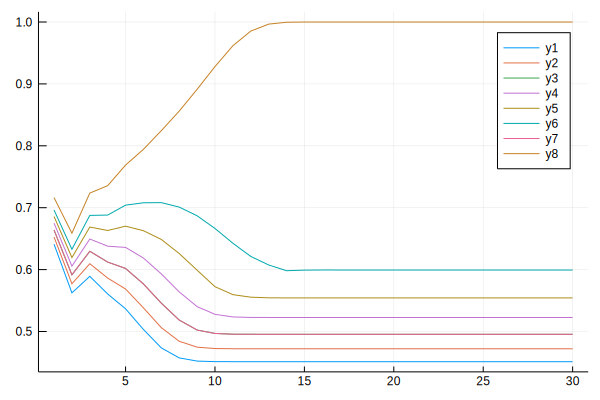

In [28]:
plot(res0_39[:,1],y)

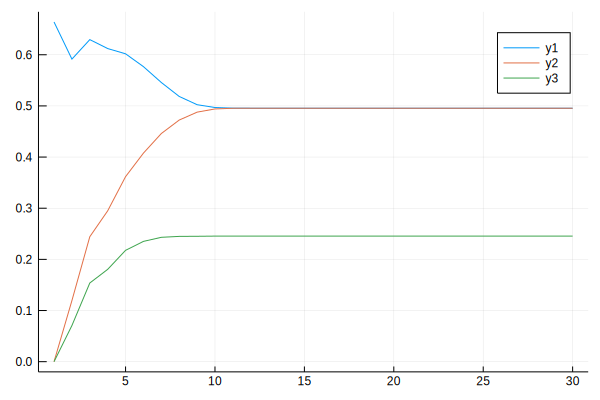

In [31]:
plot(res0_44[:,1],[res0_44[:,2],res0_44[:,3],res0_44[:,4]])